
<img src="https://image.ibb.co/gw4Gen/Index-GMIT.png" alt="Index-GMIT" border="0">

## Practical Assignment: ***Anscombe's quartet dataset***

* Assignment for Fundamentals of Data Analytics
* Start date: 12-10-2018 End date 11-11-2018

--------------------------------
### Assignment outine and objectives
1. Explain the background to the dataset – who created it, when it was created, and
any speculation you can find regarding how it might have been created.
2. Plot the interesting aspects of the dataset.
3. Calculate the descriptive statistics of the variables the dataset.
4. Explain why the dataset is interesting, referring to the plots and statistics above.

--------------------------
### Background and overview of the dataset

#### "Graphs are essential to good statistical analysis"

Francis Anscombe was an English statistician, who in 1973 published a highly relevant and timeless paper called *Graphs in Statistical Analysis*, which was intended to counter the impression among statisticians that numerical calcutions are exact whereas plots are "rough" [3]. Anscombe's quartet is a set of four small datasets where each produces almost identical summary statistics (mean, standard deviation, variance and correlations), which could lead most laypersons to infer that the datasets are very similar [1]. However, while the statistical properties prove to be near identical, plotting the data reveals that the datasets are in fact notably different.

Anscombe published this paper in order to demonstrate the importance of plotting data *before* analyzing it, and to show the effect outliers can have on statistical properties [2]. In his paper he makes the astute observation that very little attention is given to plots and that most people should avoid making assumptions such as:

* Numerical calculations are very precise while graphs are "rough".
* For any kind of statistical data there exists only one set of calulations which results in an accurate analysis.
* That performing calculations is something of a virtue while looking at the plotted data is "cheating" [2].

Anscombe purported that computers should produce *both* calculations and plots and that both must be studied because each will contribute to understanding. Indeed, by looking at the qualities and features of Anscombe's dataset and by understanding his analyses, we can much better appreciate his observational stance on the matter.

--------------------------------
### Opening the dataset

We can open and format the Anscombe dataset in various ways. Each method will display slightly different table formats. Below I demonstrate three methods:

In [13]:
# Opening the dataset with pandas

import pandas as pd # Importing pandas to abbreviated form pd
dataframe = pd.read_csv("anscombe.csv") # Reads the csv and assigns this to the new object "dataframe" 
dataframe # Prints dataframe output

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


In [24]:
# Opening the dataset with the CSV reader

import csv # Importing the csv module
f = open("anscombe.csv") # Using csv-open to open the dataset
csv_f = csv.reader(f) # Using csv-reader to read the dataset, and assigns it to new "csv_f" object
for row in csv_f: # for loop that iterates over dataset rows
    print('{:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6}'.format(*row)) 
    # using the format method to allign rows.
    # The > symbol right-aligns the rows, (Use < for left allignment) 
    # The integer in the curly braces specifies the column width. The braces can also include a positional argument before the colon (:)

           x1     x2     x3     x4     y1     y2     y3     y4
     1     10     10     10      8   8.04   9.14   7.46   6.58
     2      8      8      8      8   6.95   8.14   6.77   5.76
     3     13     13     13      8   7.58   8.74  12.74   7.71
     4      9      9      9      8   8.81   8.77   7.11   8.84
     5     11     11     11      8   8.33   9.26   7.81   8.47
     6     14     14     14      8   9.96    8.1   8.84   7.04
     7      6      6      6      8   7.24   6.13   6.08   5.25
     8      4      4      4     19   4.26    3.1   5.39   12.5
     9     12     12     12      8  10.84   9.13   8.15   5.56
    10      7      7      7      8   4.82   7.26   6.42   7.91
    11      5      5      5      8   5.68   4.74   5.73   6.89


In [5]:
# Opening the dataset with Seaborn

import seaborn as sns # Importing Seaborn as abbreviated sns
import matplotlib.pyplot as plt # Importing matplotlib as abbreviated form plt
sns.set(style="ticks") # Setting the theme; There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks [10].

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

df # Outputting the dataset

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


With our dataset printed out we can now begin to study it for any peculiarities or interesting features.

We can see that the quartet is made of of 9 columns and 11 rows; four X columns, four Y columns and an index column. This is how Anscombe chose to partition the datasets. Remember, this is in fact four merged datasets and not just one. Rather quickly I noticed a very salient feature pertaining to the X variables. It is almost impossible to overlook. Every row in the X1, X2 and X3 columns are identical, whereas the floats in X4 are very different. 

-----------------------
### Calculating the descriptive statistics of the variables the dataset
-----------------------

First, we can get a glimpse of how many examples (rows) and how many attributes (columns) the Anscombe dataset contains with the **shape** method:

In [27]:
dataframe.shape

(11, 9)

We can see from the output above that the Anscombe dataset is comprised of 11 rows and 9 columns. Next we can take a look at a summary of each Anscombe attribute. This includes the count, mean, min and max values as well as some percentiles:

In [6]:
import numpy as np # Importing numpy as abbreviated np
np.round(dataframe.describe(), decimals=2) # Rounds descriptive output data to 2 decimals

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,6.00,9.00,9.00,9.00,9.00,7.50,7.50,7.50,7.50
std,3.32,3.32,3.32,3.32,3.32,2.03,2.03,2.03,2.03
min,1.00,4.00,4.00,4.00,8.00,4.26,3.10,5.39,5.25
25%,3.50,6.50,6.50,6.50,8.00,6.32,6.70,6.25,6.17
50%,6.00,9.00,9.00,9.00,8.00,7.58,8.14,7.11,7.04
75%,8.50,11.50,11.50,11.50,8.00,8.57,8.95,7.98,8.19
max,11.00,14.00,14.00,14.00,19.00,10.84,9.26,12.74,12.50


From the descriptive summary statistics table above, we can make a number of key observations:

The mean of all X values are identical at 9. The mean of all Y values are also identical at 7.5. The standard deviation of all X values is 3.32, and the standard deviation for all Y values is similar at 2.03. These results reveal almost identical statistical properties, which typically suggests an absence of significance in our data.

Next lets look at the correlations between the X and Y variables to see, like the summary stats if similarities occur. 
By running the correlation function, we can infer from the table if the correlation coefficients (r values) between the X and Y values share any strong positive or negative relationships:

In [5]:
# Producing a Pearson correlation table of the Anscombe data

np.round(dataframe.corr(), decimals=3) ## Rounds correlation output data to 3 decimals

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
Unnamed: 0,1.000,-0.427,-0.427,-0.427,0.200,-0.308,-0.576,-0.430,0.116
x1,-0.427,1.000,1.000,1.000,-0.500,0.816,0.816,0.816,-0.314
x2,-0.427,1.000,1.000,1.000,-0.500,0.816,0.816,0.816,-0.314
x3,-0.427,1.000,1.000,1.000,-0.500,0.816,0.816,0.816,-0.314
x4,0.200,-0.500,-0.500,-0.500,1.000,-0.529,-0.718,-0.345,0.817
y1,-0.308,0.816,0.816,0.816,-0.529,1.000,0.750,0.469,-0.489
y2,-0.576,0.816,0.816,0.816,-0.718,0.750,1.000,0.588,-0.478
y3,-0.430,0.816,0.816,0.816,-0.345,0.469,0.588,1.000,-0.155
y4,0.116,-0.314,-0.314,-0.314,0.817,-0.489,-0.478,-0.155,1.000


The outputted table shows a large number of negative and positive correlations. Most of these relationships are negative and weak/medium. However, there is a very strong positive relationship between X1 and Y1 with a value of 0.816. What is even more interesting is the fact that this exact value exixts for *all* of the correlations between X2 and Y2, X3 and Y3, and X4 and Y4 (0.817). 

So, we can see that the summary statistics and correlations are, if not the same, very similar. But we can go a bit further and take a look at the relationship between X and Y in each dataset by computing the regression line and visualising it:

--------------------------------

### Plots of interesting aspects of the dataset

Lets plot the most interesting aspects of Anscombe's datasets. Ansombe performed regression analyses on all four datasets and his plotted results are striking. They divulge a story which was hidden in plain sight among the descriptive statistics:

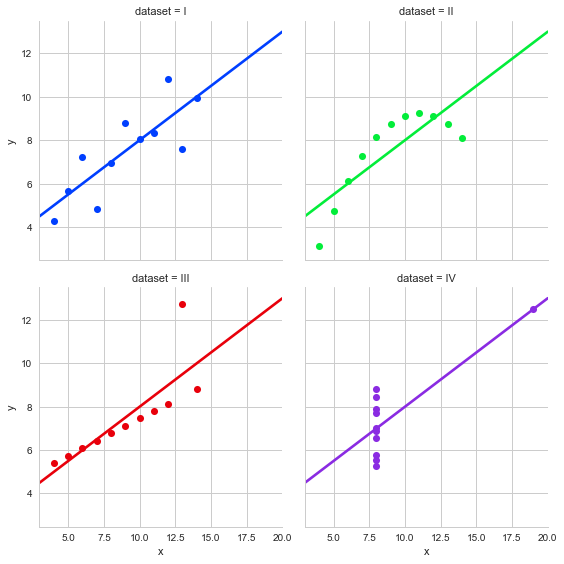

In [7]:
# Showing the results of Amscombe's linear regression within each of the 4 datasets

# We will use Seaborn to plot the data with 4 regression models on a "Facet grid"

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2, ci=None, palette="bright", size=4, scatter_kws={"s": 50, "alpha": 1})
sns.set_style("whitegrid") # Whitegrid Seaborn theme: This grid helps the plot serve as a lookup table for quantitative information [10].

# col, hue: Variables that define subsets of the data, which will be drawn on separate facets in the grid
# data: (Dataframe) "df" was the object we created above for loading the Anscombe dataset. Each column is a variable and each row is an observation.
# col_wrap: Wrap the column variable at this width, so that the column facets span multiple rows. 
# ci: Size of the confidence interval for the regression estimate.
# palette: Colors to use for the different levels of the hue variable. I have chosen "bright" from: https://seaborn.pydata.org/tutorial/color_palettes.html 
# size: Determines the size scale of the ouputted plots.
# scatter_kws: Additional keyword argument to pass to plt.scatter and plt.plot. In this case to determine the point qualities
# "s" determines point size. "alpha" is the blending value between 0 (transparent) and 1 (opaque), for the points [4].

plt.show()


There we have it. Compared to the descriptives stats we have just observed, the four plots tell a completely different side of the story. It is almost paradoxical. Let's examine how and why the plots turned out so strikingly different from one another and from what the descriptives told us. But before we do that, let's also display the regression statistics in our plot outputs, e.g the slope, intercept, R-squared values and p values:

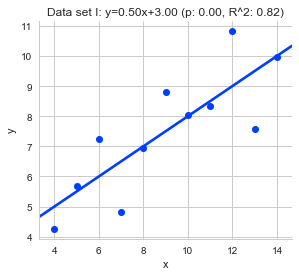

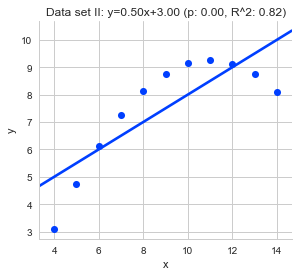

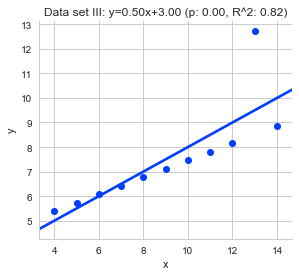

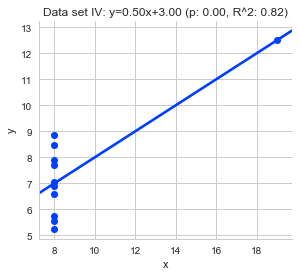

In [34]:
from scipy import stats  # Importing SciPy stats for linear regression statistics

for data_set in df.dataset.unique(): # for loop that iterates over unique values in df[dataset] 
    df_ans = df.query("dataset == '{}'".format(data_set)) # Reassigning previous df datafrme object to query the columns and return the sorted unique elements of the dataframe into new df_ans object.
    slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x=df_ans.x, y=df_ans.y) # Calculates a linear least-squares regression for two sets of measurements.

# Configurating the properties of the plots as previouslt demonstrated:
    sns.lmplot(x = "x", y = "y", col = "dataset", hue = "dataset", data = df_ans, col_wrap=2, ci=None, palette="bright", size=4, scatter_kws={"s": 50, "alpha": 1});
    sns.set_style("whitegrid") # Setting whitegrid theme for ease of quantitative reference
    plt.title("Data set {}: y={:.2f}x+{:.2f} (p: {:.2f}, R^2: {:.2f})".format(data_set, slope, intercept, p_val, r_val)) # Using format to specify the title format better[5].

First we observed that the summary stats revealed how the quartets share almost identical means, variances and correlations. Next, we saw from the plot outputs, how each dataset is in evidently different, that is from the stats and from each other. Now, we have just observed another striking fact; That the regression statistics have revealed identical regression slope, intercept, and p, and R-squared values). The plot output shows the same fitted regression line (y = 0.5x + 3), p-values (0.0), and R-squared values (0.82) [5].

What are the slope, intercept, p and R-squared values?

* Essentially, any regression line can be described in terms of its slope and intercept. The y-intercept (or y-constant) for example is the height of the line when x is 0, and the slope is the rate at which y increases, per unit increase in x. More specifically, the slope of a regression line (b) represents the rate of change in y as x changes. Because y is dependent on x, the slope describes the predicted values of y given x [6].

* A p-value represents the probability that a test statistic is significantly different from the null hypothesis. With a range of 0 to 1, the p-value shows how likely it is that a treatment group is significantly different from a control group. The closer to 0, the more likely the data is significant and not different by chance [6].

* R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination. In general, the higher the R-squared, the better the model fits your data [7].

---------------------

The Anscombe quartet datasets demonstrate some fine examples where simple linear regression provides an identical estimate of a relationship where visual inspection clearly shows differences. Let's have a look at each dataset. 

In dataset 1, the linear regression is clearly a good model which shows a nice line of fit and follows the assumption of normality. The observations appear randomly distributed around the regression line, just as the model assumes, and seems adequate for a linear regression, therefore no issues here.

The relationship in dataset 2 is good but clearly not linear. This is an example of lack of fit, the model *assumes* a linear relationship but the dependence is in fact curve-linear, or as Anscombe suggested possibly quadratic. It shows no outliers but it is not distributed normally or a good model. In fact, it shows a high deviation from the regression line. Such non-linear, higher order data can still be remedied and visualized better using the lmplot() and regplot() functions. These functions can fit a *polynomial* regression model in order to explore simple kinds of nonlinear trends in the dataset [8].  

A polynomial model will fit a nonlinear relationship between the value of x and the corresponding mean of y, and has been used to describe nonlinear phenomena such as the growth rate of tissues, for analyzing gains and losses over large datasets, and the progression of disease epidemics. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, which means the fitting process is simple. The main advantages of polynomial fits include reasonable flexibility for data that is not too complicated [11]. Let's take a look:

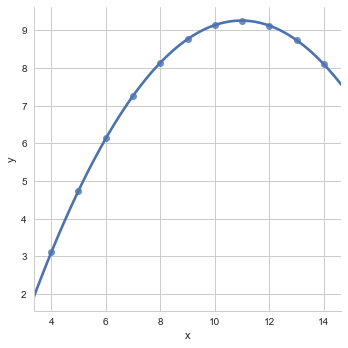

In [42]:
sns.lmplot(x = "x", y = "y", data = df.query("dataset == 'II'"),order =2) 
# "Order" for the levels of the faceting variables. Order 1 for example will output typical regression line wheareas order 2 is polynomial [4].
sns.set_style("whitegrid") # Setting whitegrid theme for ease of quantitative reference

We can clearly see that the polynomial model displays a curved line. Indeed, it is wise to employ this model when data tends to fluctuate. The previously mentioned "order" of the polynomial is determined by the number of fluctuations in the data or by how many bends (hills and valleys) appear in the curve i.e. quantified by the sum of its exponents (the number of times a number is multiplied by itself) [11]. 

Dataset 3 presents a different issue with an outlier observation that deviates from the rest of the relationship, thus throwing off the linear model. This can cause the correlation coefficient to drop from 1 to 0.816. It is thus often prudent to remove such outliers to prevent "noise" in a model and to enhance its applicability. If we didn’t plot the data, we would probably never notice these crucial features. Nonetheless, the distribution is linear, but like dataset 2, should have a different regression line. In the presence of outliers, it can be useful to fit a *robust* regression, which uses a different function to "de-weight" relatively large residuals [9].  A residual is the difference between the predicted value (based on the regression equation) and the actual, observed value, an outlier is an observation with large residual [12]:

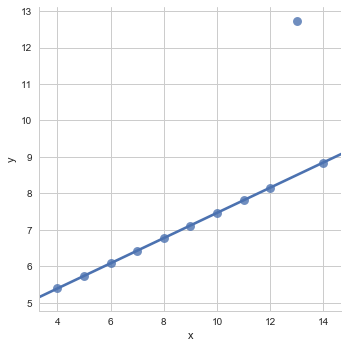

In [36]:
sns.lmplot(x = "x", y = "y", data = df.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80});
# If "robust" is True, it uses statsmodels to estimate a robust regression which will de-weight outliers [4].
sns.set_style("whitegrid") # Setting whitegrid theme for ease of quantitative lookup

Robust regression can be employed when data are contaminated with outliers or influential observations. Indeed, from the output above we can now see a better line of fit which still keeps the outlier. Essentially, robust regression can be used in situations like this in which we might find some outliers or high leverage data points i.e. it greatly deviates from its mean. We may decide that these data points are not data entry errors, nor are they from a different population than most of our data, so we have no real reason to exclude them from our analysis. Robust regression is thus a compromise between excluding these points entirely from the analysis and including all the data points and treating all them equally in the regression [12]. 


Dataset 4 shows a non linear relationship between the data points. The dataset also shows how one outlier is powerful enough to generate a high coefficient despite the fact the other data points show no relationship between the X and Y variables. Even though it does not look like a typical linear regression, it is still as explanatory as the plot of dataset 1Why is that ? Because if the outlier didn't exist, the slope could not be calculated. Indeed, almost all of the data is being completely influenced by that one data point, that is, the slope is completely determined by the observation on the right. Without that observation we would not be able to estimate the regression, as all x's would be the same [13]. Anscombe attested to this fact, by purporting that dataset 4 is just as *informative* as dataset 1, and that there is no reason to prefer either to the other. In most circumstances most of us would feel there was something unsatisfactory about dataset 4. If any data point in dataset 1 was omitted it would still tell the same story but that would certainly not be the case for dataset 4. Therefore the regression calculation in dataset 4 should be offered with a caution about the role of its highly influential outlier [2]. 

How do we discern which model could be applied in the real world ? 

Anscombe insists we use and trust the graphs: He proposed that looking at the data immediately reveals a lot of the structure, and makes the analyst aware of “pathological” cases, like in the case of dataset 4 [2]. Were not anti-stats, on the contrary, statistics are great for describing general trends and aspects of data, but statistics alone can't fully depict a datasets story. Data is influenced easily by outliers which can cause unwanted noise in our analyses or render a predictive model useless. Therefore, it is always prudent to form a habit of eyeballing our data via plotting prior to analysis. Indeed, visualization of the data before hand can afford many potentially valuable insights such as detecting errors, recognising patterns, exploring relationships, confirming or negating assumptions, assessing the adequacy of the model fit, and so forth [15]. 

Anscombe himself states that graphs have various purposes like helping us perceive and appreciate broad features of the data, and to let us look behind those features to unearth what else lies there. He also draws attention to the fact that most statistical calculations rest on assumptions about the behaviour of data, but that these assumptions can be false or misleading. Graphs help us perceive the way in which these assumptions may be erroneous [2]. 



----------------------------

### Why the datasets are interesting

The datasets are incredibly interesting, each so similar yet paradoxically dissimilar. What is equally as interesting is that so many people, analysts included, begin to sift through their data with a headful of pre-established assumptions. Assumptions about the very nature of the data presented to them.

Anscombe’s quartet is a case in point. A case which reveals how four datasets that have identical statistical properties can be very different indeed. His work is a fine example justifying how a summary of a dataset can (and often will) inherently lose crucial information, and thus should be accompanied by further understanding, in this case visualizing plots of the data. We have established that there is a real danger in relying on descriptive statistics alone and ignoring the overall distribution. Indeed, his datasets seem to be more or less the same, at least until they are plotted. It is an exemplory demonstration of the importance of plotting the data prior to analyzing it in order to get a obtain a clearer picture of what is really going on [14]. This is not to say the descriptives are useless, far from it, but it is often true that they are not so explanatory or even useful on their own. 

Statistical properties like the variance, mean, or even regression values simply cannot accurately portray data in its true form. Anscombe showed that. Indeed, statistics do not fully depict the data set in its entirety. His quartet also implicitly warns us about the dangers of outliers in datasets. Suppose the plots of datasets 3 and 4 didn't have that one data point that strayed from all the other points, their statistical properties would no longer be identical to the first two plots. In most cases, it is often better practice to remove outliers if you have found they have a high probability of affecting your statistical testing. Anscombe points out that in comparison to the stats, plots show a variety of features such as outliers quickly and vividly. Another observation is that of the type of regression applied to the data. Take the example of dataset 2. While all four data sets have the same linear regression values, it was quite obvious that dataset 2 shouldn't have been analyzed with a typical linear regression at all because as we saw earlier, plotting the regression quickly established that it has a curve-linear distribution [14]. 

Anscombe stresses that both types of output, i.e. calculations and graphs should be studied as each will contribute to understading. This is on the money, effective and meaningful analytics should be a balanced combination of both numerical statistics and clear, explanatory visualizations. Anscombe was a firm believer that thought and ingenuity devoted to creating good graphs would most likely pay off [2].

## References


[1]. Matejka, J., Fitzmaurice, G. (2017). *Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing*. Autodesk Research, Toronto Canada. 

[2]. Anscombe, F.J. (1973). *Graphs in Statistical Analysis*. The American Statistician 27, 1, 17–21.

[3]. Wikipedia, multiple authors (2018). *Anscombe's quartet*. Retrieved from: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

[4]. Waskom, M. (2018). *seaborn.lmplot". Retrieved from: https://seaborn.pydata.org/generated/seaborn.lmplot.html

[5]. Knight, V. (2016). *Anscombe's quartert, variability and studying queues with Python*. Retrieved from: https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html

[6]. Chegg.com, mulptiple authors (2018). *Get Definitions of key Statistics And Probability concepts and terms*. Retreived from: https://www.chegg.com/homework-help/definitions/slope-of-regression-line-31

[7]. Ogee, A. & Ellis, M. (2018). *Regression Analysis*. Retrieved from: https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

[8]. Tutorialspoint.com. multiple authors (2018). *Seaborn-Linear relationships*. Retreived from: https://www.tutorialspoint.com/seaborn/seaborn_linear_relationships.html

[9]. Waskom, M. (2018). *Visualizing linear relationships*. Retrieved from: https://seaborn.pydata.org/tutorial/regression.html

[10]. Waskom, M. (2018). *Controlling figure aesthetics*. Retrieved from: https://seaborn.pydata.org/tutorial/aesthetics.html

[11]. Wikipedia, multiple authors (2018). *Polynomial regression*. Retrieved from: https://en.wikipedia.org/wiki/Polynomial_regression

[12]. UCLA.edu, multiple authors (2018). *Robust regression*. Retrieved from: https://stats.idre.ucla.edu/r/dae/robust-regression/

[13]. Rodriguez, G. (2017). *Generalized Linear Models*. Retrieved from: http://data.princeton.edu/wws509/stata/anscombe.html

[14]. Mathwarehouse.com, multiple authors (2017). *What is Anscombe's Quarter in Statistics?*. Retrieved from: https://www.mathwarehouse.com/statistics/what-is-anscombes-quartet.php

[15]. Chatterjee, S. & Hadi, A. S. (2006). *Regression analysis by example*. John Wiley and Sons. p. 91. ISBN 0-471-74696-7.